### Perimeter Institute Nov 21st
### 2018 computational physics course
# Exact Diagonalization
 
Guifre Vidal  

# IJulia nb3: Low energy spectrum and quantum criticality

In [1]:
using PyPlot
using LinearAlgebra
using Arpack

In [2]:
# function buildH takes as input N (number of spins) and theta (magnetic field angle) and outputs H (Ising Hamiltonian)

function buildH(N::Int64,theta::Float64)::Array{Float64,2} 
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    E = diagm(0=>ones(2))
    XX = kron(X,X)
    HXX = XX
    HZ = kron(Z,E) + kron(E,Z)
    for n = 3:N
        HXX = kron(HXX,E)+kron(diagm(0=>ones(2^(n-2))), XX)
        HZ =  kron(HZ,E) + kron(diagm(0=>ones(2^(n-1))),Z)
    end
    HXX = HXX + kron(X,kron(diagm(0=>ones(2^(N-2))),X))
    H = -cos(theta)*HXX - sin(theta)*HZ
    return H
end

buildH(3,pi/4) # test for N=3 and critical theta = pi/4


8×8 Array{Float64,2}:
 -2.12132   -0.0       -0.0       …  -0.707107  -0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.707107  -0.0       -0.0          -0.707107  -0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.707107  -0.0       -0.0       …   0.707107  -0.707107  -0.0     
 -0.707107  -0.0       -0.0          -0.707107   0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0        2.12132 

### functions eigen(H) vs eigs(H, nev=2)


In [5]:
N = 8
H = buildH(N,pi/2)
D,U = eigen(H)
d,u = eigs(H, nev=2, which=:SR) # :LR largest real, :SR smallest real, :LM largest magnitude, :SM smallest magnitude 
display([D[1] d[1]])
Psi1 = U[:,1]
Psi2 = u[:,1]
display(abs(Psi1'*Psi2))

1×2 Array{Float64,2}:
 -8.0  -8.0

1.0

### Excercise (1/2):  check the scaling of computational time with $N$

In [6]:
Nmin = 4 
Nmax = 10  # Nmax ~ 10 recomended, 11 OK, but not much larger!!!
time_full = zeros(Nmax-Nmin + 1)
time_1 = zeros(Nmax-Nmin + 1)
time_8 = zeros(Nmax-Nmin + 1)
theta = pi/3
n_repeat = 1;

In [7]:
# full
for N in Nmin:Nmax
    H = buildH(N,theta)

    t1 = time()
    for n=1:n_repeat 
        D,U = eigen(H)
    end
    t2 = time()
    time_full[N-Nmin+1] = t2-t1
    display([size(H) t2-t1])
    sleep(0.5)
end

1×2 Array{Any,2}:
 (16, 16)  0.0

1×2 Array{Any,2}:
 (32, 32)  0.0

1×2 Array{Any,2}:
 (64, 64)  0.0

1×2 Array{Any,2}:
 (128, 128)  0.0469999

1×2 Array{Any,2}:
 (256, 256)  0.0780001

1×2 Array{Any,2}:
 (512, 512)  0.168

1×2 Array{Any,2}:
 (1024, 1024)  0.712

In [8]:
# nev=1
for N in Nmin:Nmax
    H = buildH(N,theta)

    t1 = time()
    for n=1:n_repeat 
        D,U = eigs(H,nev=1)
    end
    t2 = time()
    time_1[N-Nmin+1] = t2-t1
    display([size(H) t2-t1])
    sleep(0.5)
end

1×2 Array{Any,2}:
 (16, 16)  0.062

1×2 Array{Any,2}:
 (32, 32)  0.0

1×2 Array{Any,2}:
 (64, 64)  0.0

1×2 Array{Any,2}:
 (128, 128)  0.00499988

1×2 Array{Any,2}:
 (256, 256)  0.0

1×2 Array{Any,2}:
 (512, 512)  0.00900006

1×2 Array{Any,2}:
 (1024, 1024)  0.0469999

In [9]:
# nev=8
for N in Nmin:Nmax
    H = buildH(N,theta)

    t1 = time()
    for n=1:n_repeat 
        D,U = eigs(H,nev=8)
    end
    t2 = time()
    time_8[N-Nmin+1] = t2-t1
    display([size(H) t2-t1])
    sleep(0.5)
end

1×2 Array{Any,2}:
 (16, 16)  0.0

1×2 Array{Any,2}:
 (32, 32)  0.0

1×2 Array{Any,2}:
 (64, 64)  0.0

1×2 Array{Any,2}:
 (128, 128)  0.0149999

1×2 Array{Any,2}:
 (256, 256)  0.0309999

1×2 Array{Any,2}:
 (512, 512)  0.0310001

1×2 Array{Any,2}:
 (1024, 1024)  0.11

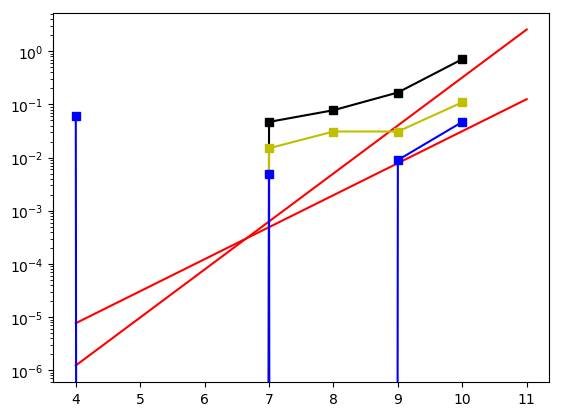

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000028624320>

In [10]:
semilogy([i for i in Nmin:Nmax+1], [(3e-10)*2^(3i) for i in Nmin:Nmax+1], color = "r")
semilogy([i for i in Nmin:Nmax+1], [(3e-8)*2^(2i) for i in Nmin:Nmax+1],  color = "r")

semilogy([i for i in Nmin:Nmax], time_full, marker = "s", color = "k")
semilogy([i for i in Nmin:Nmax], time_8, marker = "s", color = "y")
semilogy([i for i in Nmin:Nmax], time_1, marker = "s", color = "b")

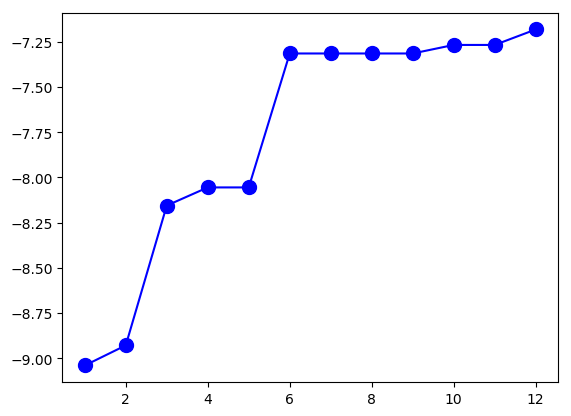

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FDFC208>

In [11]:
N=10
Nstates = 12
H = buildH(N,pi/4)
D,U = eigs(H, nev=Nstates, which=:SR) # :LR largest real, :SR smallest real, :LM largest magnitude, :SM smallest magnitude 
plot(collect(1:Nstates), sort(D), marker = "o", markersize = 10, color = "b")

### Conformal data (scaling dimensions and conformal spins) of the Ising CFT
### Let us plot the 12 lowest scaling dimensions (and corresponding conformal spins)

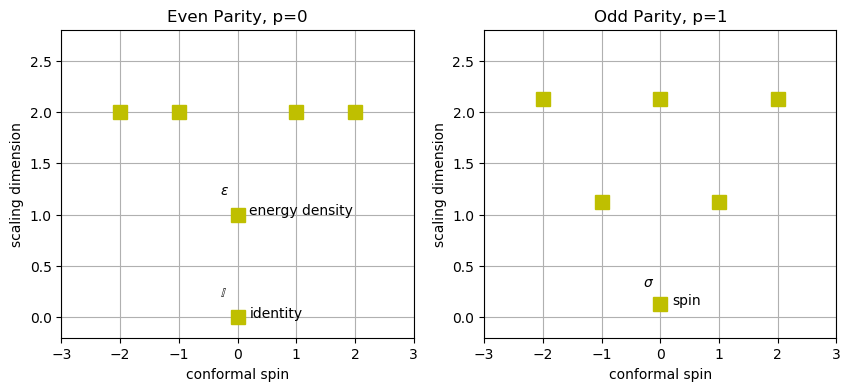

In [13]:
# Plot exact scaling dimensions (Delta) and conformal spins (spin) in each parity sector (parity) 
Ndim = 12
Delta = [0 1/8 1 1+1/8 1+1/8 2 2 2 2 2+1/8 2+1/8 2+1/8]
spin = [0 0 0 1 -1 2 1 -1 -2 2 0 -2]
parity = [0 1 0 1 1 0 0 0 0 1 1 1]

figure("conformal_data_pbc",figsize=(10,4))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=0")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("identity", xy=[0.2;0])
annotate(L"$\mathbb{I}$", xy=[-0.3;0.2])
annotate("energy density", xy=[0.2;1])
annotate(L"$\epsilon$", xy=[-0.3;1.2])

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Odd Parity, p=1")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("spin", xy=[0.2;1/8])
annotate(L"$\sigma$", xy=[-0.3;0.3])

for i=1:Ndim
    if parity[i] == 0
        subplot(121)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    elseif parity[i] == 1
        subplot(122)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    end
end 

### Exercise (2/2): obtain & plot numerical estimates for 12 scaling dimensions and conformal spins ($N=10$ spins)
### hint: In any CFT, the lowest energy state with momentum $k 2 \times 2\pi/N$ (or spin $s = 2$) corresponds to a CFT operator called stress tensor, which has  $(\Delta_T,s_T) = (2,2)$. 
### Find the stress tensor energy eigenstate $|T\rangle$ and use its energy to estimate the scaling dimensions $\Delta_i$ of the rest of energy eigenstates according to $\Delta_i = 2 (e_i-e_1)/(e_T - e_1)$. 

# Solution

In [16]:
# function buildT takes as input N (number of spins) and outputs T (translatio operator)
function buildT(N::Int64)::Array{Float64,2} 
    SWAP = [1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]
    E = diagm(0=>ones(2))
    T = copy(SWAP)
    for n=3:N
        SWAPn = kron(diagm(0=>ones(2^(n-2))), SWAP)
        T =  SWAPn*kron(T,E)
    end
    return T
end

buildT(3) # test for N=3  

8×8 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [17]:
# function buildP takes as input N (number of spins) and outputs P (parity operator)
function buildP(N::Int64)::Array{Float64,2} 
    Z = [1 0; 0 -1]
    P = copy(Z)
    for i=2:N
        P = kron(P,Z)
    end 
    return P
end

buildP(3) # test for N=3  

8×8 Array{Float64,2}:
 1.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0
 0.0  -1.0   0.0  0.0   0.0  0.0  0.0   0.0
 0.0   0.0  -1.0  0.0   0.0  0.0  0.0   0.0
 0.0   0.0   0.0  1.0   0.0  0.0  0.0   0.0
 0.0   0.0   0.0  0.0  -1.0  0.0  0.0   0.0
 0.0   0.0   0.0  0.0   0.0  1.0  0.0   0.0
 0.0   0.0   0.0  0.0   0.0  0.0  1.0   0.0
 0.0   0.0   0.0  0.0   0.0  0.0  0.0  -1.0

In [18]:
N=10
Nstates = 12
H = buildH(N,pi/4)
T = buildT(N)
P = buildP(N)
HTP = H + 0.0001*T + im*0.01*P - N*2*I # notice that we need to the low energy spectrum have the largest magnitude
D,U = eigs(HTP, nev=Nstates); # which is, eigs(HTP, nev=Nstates, which=:LM) by default

In [19]:
e = real(diag(U'*H*U)) 
k = angle.(diag(U'*T*U))
p = real(diag(U'*P*U))
p = round.((1 .- p)/2) 
perm = sortperm(e) # re-order eigenvalues according to E
e = e[perm]
k = k[perm] 
p = p[perm]
display([e k p])

s = k/(2pi)*N

i_stress = 0
for i in 1:size(e,1)
    if abs(s[i] - 2.0) < 1e-5 && i_stress == 0
        i_stress = i
    end
end
d = (2.0-0)*(e.-e[1])/(e[i_stress]-e[1])

display([d s p])

12×3 Array{Float64,2}:
 -9.04029   2.38524e-16  -0.0
 -8.92899   1.2837e-16    1.0
 -8.15537  -6.245e-17    -0.0
 -8.05496   0.628319      1.0
 -8.05496  -0.628319      1.0
 -7.31375   1.25664      -0.0
 -7.31375   0.628319     -0.0
 -7.31375  -1.25664      -0.0
 -7.31375  -0.628319      0.0
 -7.26649  -1.25664       1.0
 -7.26649   1.25664       1.0
 -7.18093   1.14492e-16   1.0

12×3 Array{Float64,2}:
 0.0        3.79623e-16  -0.0
 0.128929   2.04306e-16   1.0
 1.02509   -9.93923e-17  -0.0
 1.14139    1.0           1.0
 1.14139   -1.0           1.0
 2.0        2.0          -0.0
 2.0        1.0          -0.0
 2.0       -2.0          -0.0
 2.0       -1.0           0.0
 2.05475   -2.0           1.0
 2.05475    2.0           1.0
 2.15386    1.82219e-16   1.0

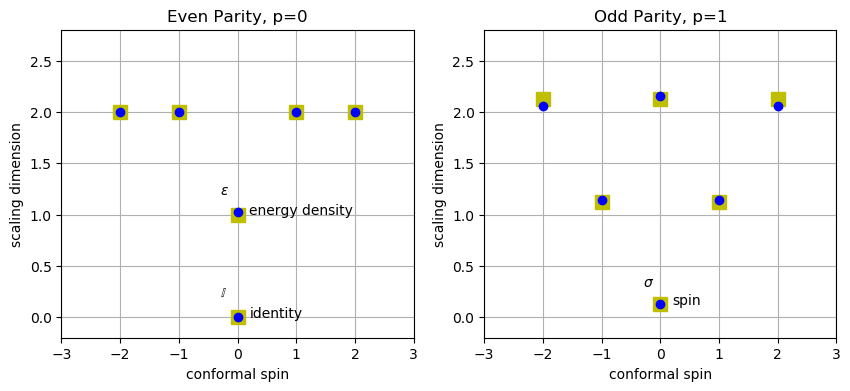

In [20]:
 # Exact and numerical values together in a plot
Ndim = 12
Delta = [0 1/8 1 1+1/8 1+1/8 2 2 2 2 2+1/8 2+1/8 2+1/8]
spin = [0 0 0 1 -1 2 1 -1 -2 2 0 -2]
parity = [0 1 0 1 1 0 0 0 0 1 1 1]

figure("conformal_data_pbc",figsize=(10,4))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=0")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("identity", xy=[0.2;0])
annotate(L"$\mathbb{I}$", xy=[-0.3;0.2])
annotate("energy density", xy=[0.2;1])
annotate(L"$\epsilon$", xy=[-0.3;1.2])

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Odd Parity, p=1")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("spin", xy=[0.2;1/8])
annotate(L"$\sigma$", xy=[-0.3;0.3])

# exact
for i=1:Ndim
    if parity[i] == 0
        subplot(121)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    elseif parity[i] == 1
        subplot(122)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    end
end  

# numerical

for i=1:Nstates
    if p[i] == 0
        subplot(121)
        plot(s[i],d[i], marker = "o", color = "b")
    elseif p[i] == 1
        subplot(122)
        plot(s[i],d[i], marker = "o", color = "b")
    end
end    
